# A Basic Example for performing an interpolation scheme with NISP

[Back To Table of Contents](../Organisms_Jupyter_Example.ipynb)

In this example, we will perform an interpolation of Au clusters. We will go through all the components of the *Interpolation_Script.py* files required to run NISP on Au, step by step. See [nisp.readthedocs.io/en/latest/How_To_Run_NISP.html](https://nisp.readthedocs.io/en/latest/How_To_Run_NISP.html) for more information on the *Interpolation_Script.py* file.

To run this notebook step by step, press the $\blacktriangleright$ button sequentially on the python code you want to run. You can find the $\blacktriangleright$ button in the menu bar above. Make sure you have run $\blacktriangleright$ on every cell before running the ``GA_Program`` execution cell. Equivalently, press the $\blacktriangleright\blacktriangleright$ button to completely run this *Run.py* file from beginning to end. You can also find the $\blacktriangleright\blacktriangleright$ button in the menu bar above. Jupyter will display a box that will ask you if you want to restart the kernal. Press the <img src="../Images/Restart_button.svg" alt="Restart_Button" width="50"/> button to run the full Jupyter notebook in Python. 

Note: These are the vanilla settings for running NISP on Au, but feel free to change the settings as you wish.

Also note: This program makes files which are created and stored on the Binder server. If you want to rerun this example from scratch, you will need to remove these files. The following block code will do this. This is only needed for this notebook and is not apart of *Interpolation_Script.py* script.

In [1]:
import os
from shutil import rmtree
to_be_removed_before_restarting_Jupyter_example = []
to_be_removed_before_restarting_Jupyter_example += [file for file in os.listdir('.') if file.startswith('Au_Max_Size_')]
for example_file_or_folder in to_be_removed_before_restarting_Jupyter_example:
    if os.path.exists(example_file_or_folder):
        if os.path.isdir(example_file_or_folder):
            rmtree(example_file_or_folder)
        else:
            os.remove(example_file_or_folder)

The *Run.py* code begins below:

## Importing NISP into script

To begin, we need to import NISP into this *Interpolation_Script.py* script. Specifically, we want to import the ``Run_Interpolation_Scheme`` into this *Interpolation_Script.py* script. We will also import a local optimiser that will be used by NISP to interpolar Au. We do this below:

In [2]:
from NISP import Run_Interpolation_Scheme 
from RunMinimisation_Au import Minimisation_Function

Loading matplotlib


In /home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

Loading nanocluster modules
Loading the interpolation rules
Loading Connection modules
Loading icosahedral, decahedral, and octahedral methods
Loading methods for manual mode
Loading os, timing, and multiprocessing modules
Beginning Interpolation Program


##  Input information for the interpolation scheme

We first load the information required by the interpolation scheme. All this information is loaded as entries into the dictionary called input_information.

The pieces of information required in input_information are:

* Element Type (str.): This is the type of element that the cluster is made up of.
* Cohesive Energy (float): This is the cohesive energy of the element you are using. See How to obtain cohesive energies to find about about how to obtain cohesive energies.
* Maximum No. of Atoms (int): The number of offspring generated per generation.
* Local Optimiser (def): This is a local optimisation method that you will locally optimise clusters with as well as their delta energies. See RunMinimisation.py - Writing a Local Minimisation Function for NISP for information about the local optimiser. If you do not want to give a local optimiser, either set input_information['Local Optimiser'] = None, or do not enter an entry for input_information['Local Optimiser'] into your Interpolation_Script.py script. Do this if you want to input your data into NISP manually.
* Manual Mode (bool): This indicates that you do not not want NISP to automatically locally optimise the clusters that are made and get their energies. if Manual Mode is set to True, the program will make all the clusters that you would like to manually locally optimise and get the energies of, as well as an input file for you to input those energies into. If you have already run this program once and got the input file, this tag will tell NISP to look through the input file and get all the data from it to make the interpolation scheme plots and results files.

An example of these parameters in Interpolation_Script.py is given below:

In [3]:
input_information = {}
input_information['Element Type'] = 'Au'
input_information['Cohesive Energy'] = -3.82819360826 #-3.82819360826
input_information['Maximum No. of Atoms'] = 1000
input_information['Local Optimiser'] = Minimisation_Function
input_information['Manual Mode'] = False

## Output information for the interpolation scheme

We then load the information required by the interpolation scheme to plot the results from the interpolation scheme. The sizes of all the clusters that you would like to obtain possible clusters for are also inputted here and given as txt files.

All this information is loaded as entries into the dictionary called output_information.

The pieces of information required in output_information are:
* Upper No of Atom Range (int): This is the upper size range that you would like to plot.
* Lower No of Atom Range (int): This is the lower size range that you would like to plot.
* Upper Delta Energy Range (float): This is the upper delta energy range that you would like to plot.
* Lower Delta Energy Range (float): This is the lower delta energy range that you would like to plot.
* Size to Interpolate Over (list of ints): These are all the sizes of clusters that you would like to obtain possible clusters for, including perfect, open-shell, and close-shell clusters.
* Filename Prefix (str.): This is the prefix of the name that you want to give to files that are create by the NISP program. This does not need to be given, as there is a default prefix given. The default filename prefix includes the element of the cluster as well as the maximum no. of atoms that the program was run up to.

An example of these parameters in Interpolation_Script.py is given below:

In [4]:
output_information = {}
output_information['Upper No of Atom Range']   = None
output_information['Lower No of Atom Range']   = None
output_information['Upper Delta Energy Range'] = None
output_information['Lower Delta Energy Range'] = None
output_information['Size to Interpolate Over'] = [38,256,165,76,561]#[37,38,44,55,147,40,888,1399]

## The number of CPUs used by the program and the filename prefix of input and output files

NISP can run for a long time, especially if you have set **Maximum No. of Atoms** to over 1000 atoms. Therefore, it is possible to run this program for a while. Therefore, it is possible to parallelise this program so that it run a bit faster. This can be set by setting the ``no_of_cpus`` variable. ``no_of_cpus`` must be set to an int. The default value for the ``no_of_cpus`` variable is ``1``. 

Furthermore, you can also give a custom name to the input and output files that you make/are made. This is given in ``filename_prefix``. However, you do not need to do this. If you dont want to have a custom filename, do not include ``filename_prefix`` in your script or set ``filename_prefix = ''``. 

In [5]:
no_of_cpus = 1
filename_prefix = ''

[Back To Table of Contents](../Organisms_Jupyter_Example.ipynb)

## Run NISP!

You have got to the end of all the parameter setting stuff. Now on to running NISP. The next part of the Interpolation_Script.py script tells NISP to run. This is written as follows in the Interpolation_Script.py. This may take a bit of time to run. 

Starting Obtaining Icosahedral Delta Energies
no atoms	no of shells
13 	noshells: 2
55 	noshells: 3
147 	noshells: 4
309 	noshells: 5
561 	noshells: 6
923 	noshells: 7
Performing Tasks
Starting ['Icosahedron', [2], 'Au']
Finished ['Icosahedron', [2], 'Au']
Finished 1/6 tasks
Starting ['Icosahedron', [3], 'Au']
Finished ['Icosahedron', [3], 'Au']
Finished 2/6 tasks
Starting ['Icosahedron', [4], 'Au']
Finished ['Icosahedron', [4], 'Au']
Finished 3/6 tasks
Starting ['Icosahedron', [5], 'Au']
Finished ['Icosahedron', [5], 'Au']
Finished 4/6 tasks
Starting ['Icosahedron', [6], 'Au']
Finished ['Icosahedron', [6], 'Au']
Finished 5/6 tasks
Starting ['Icosahedron', [7], 'Au']
Finished ['Icosahedron', [7], 'Au']
Finished 6/6 tasks
Time taken to get Icosahedral data was 7.569910526275635 s.
Ending Obtaining Icosahedral Delta Energies
Starting Obtaining Octahedral Delta Energies
no atoms	length	cutoff
6 	length: 2 	cutoff = 0
13 	length: 3 	cutoff = 1
19 	length: 3 	cutoff = 0
38 	length: 4 	cutof

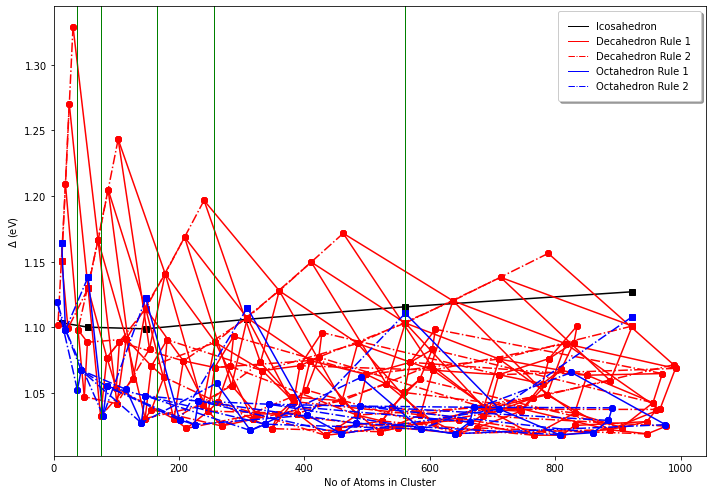

In [6]:
Run_Interpolation_Scheme(input_information=input_information,output_information=output_information,no_of_cpus=no_of_cpus,filename_prefix=filename_prefix)

[Back To Table of Contents](../Organisms_Jupyter_Example.ipynb)

## Post-processing data

Once NISP is finished, it prints out a bunch of files. These include:
* png files that shows the interpolation of Au clusters
* txt files that tell you how to remove atoms from the perfect close shell icosahedral, decahedral, and octahedral cluster to give the open shell clusters will the desired number of atoms.
See the file explorer on the right of this jupyter lab webpage to take a look at them. 
Below is an example of the interpolation scheme including lines to show how to make the open shell cl

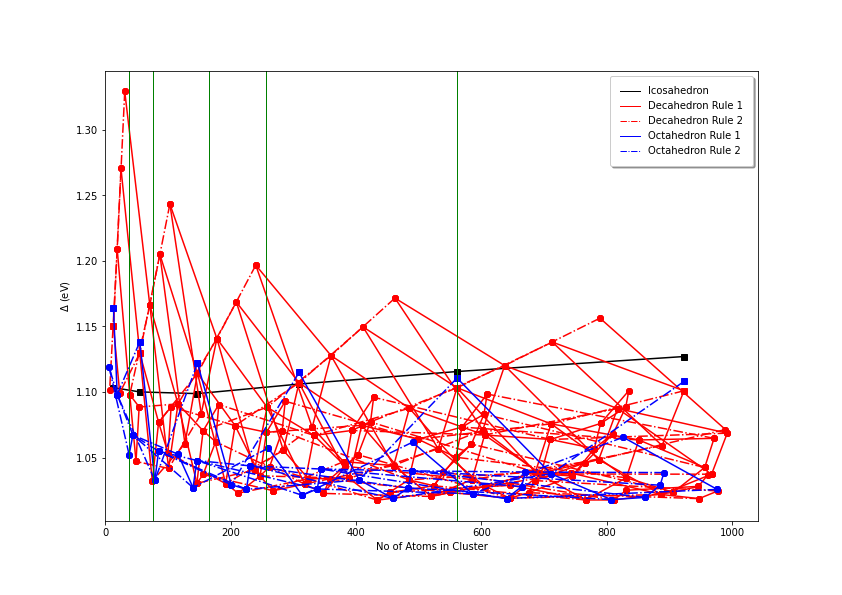

In [7]:
from IPython.display import Image
Image(filename='Au_Max_Size_1000_Interpolation_Scheme_with_lines.png') 

[Back To Table of Contents](../Organisms_Jupyter_Example.ipynb)